In [33]:
!pip install seaborn


In [34]:
pip install pandas numpy seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

Dimensiones del dataset: (297, 14)

Primeras 5 filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   c

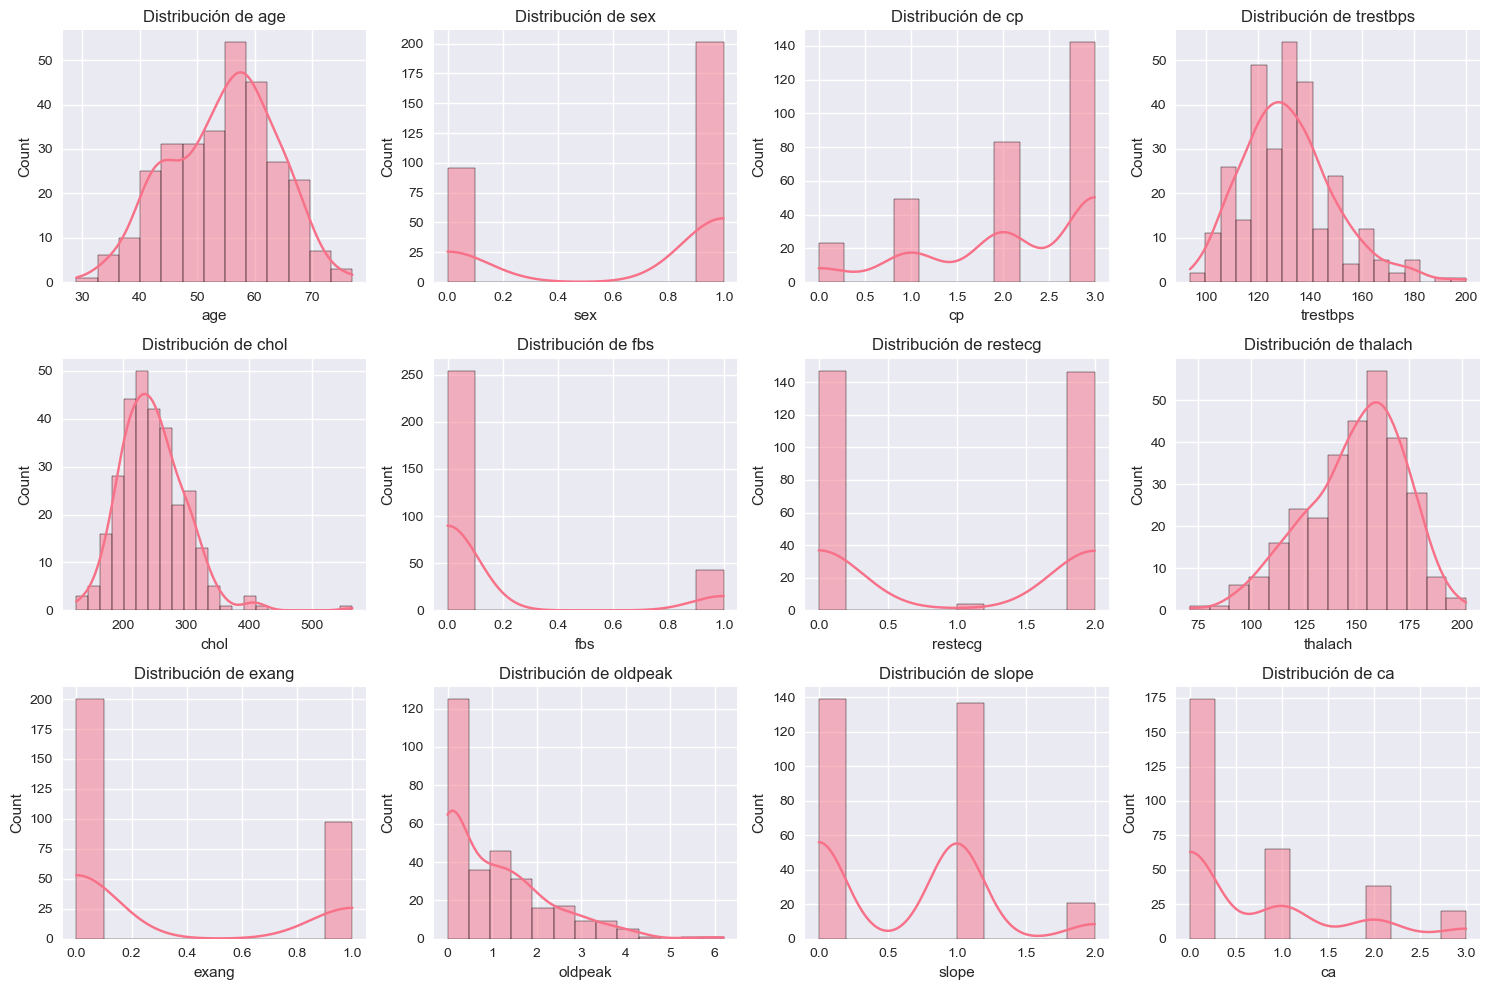


Distribuciones de las variables numéricas: Se visualizan mediante histogramas con KDE (Kernel Density Estimate).


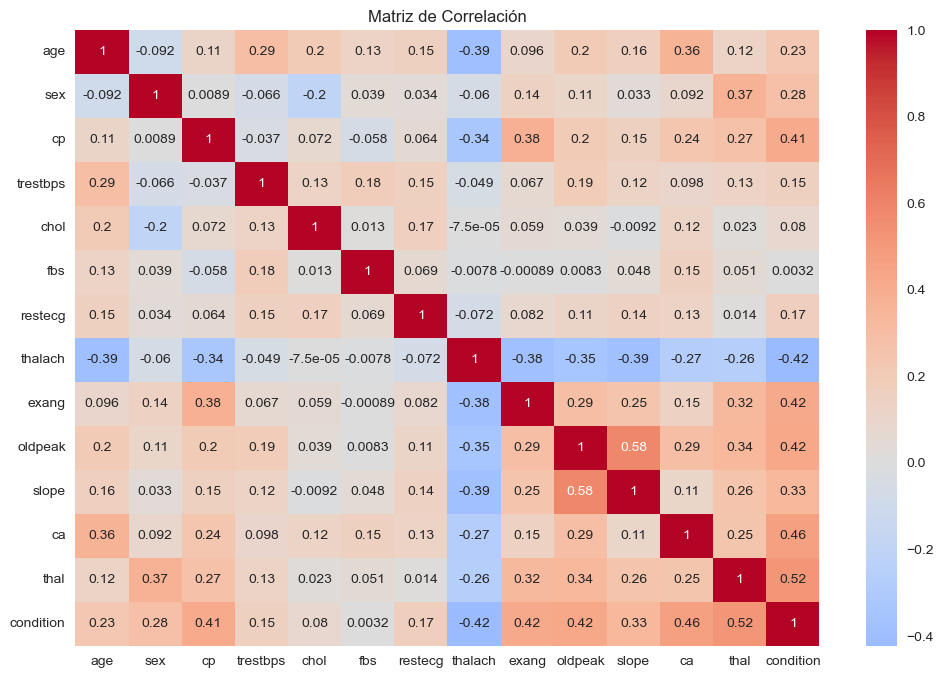


Matriz de correlación: Muestra la relación entre las variables numéricas.
Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.


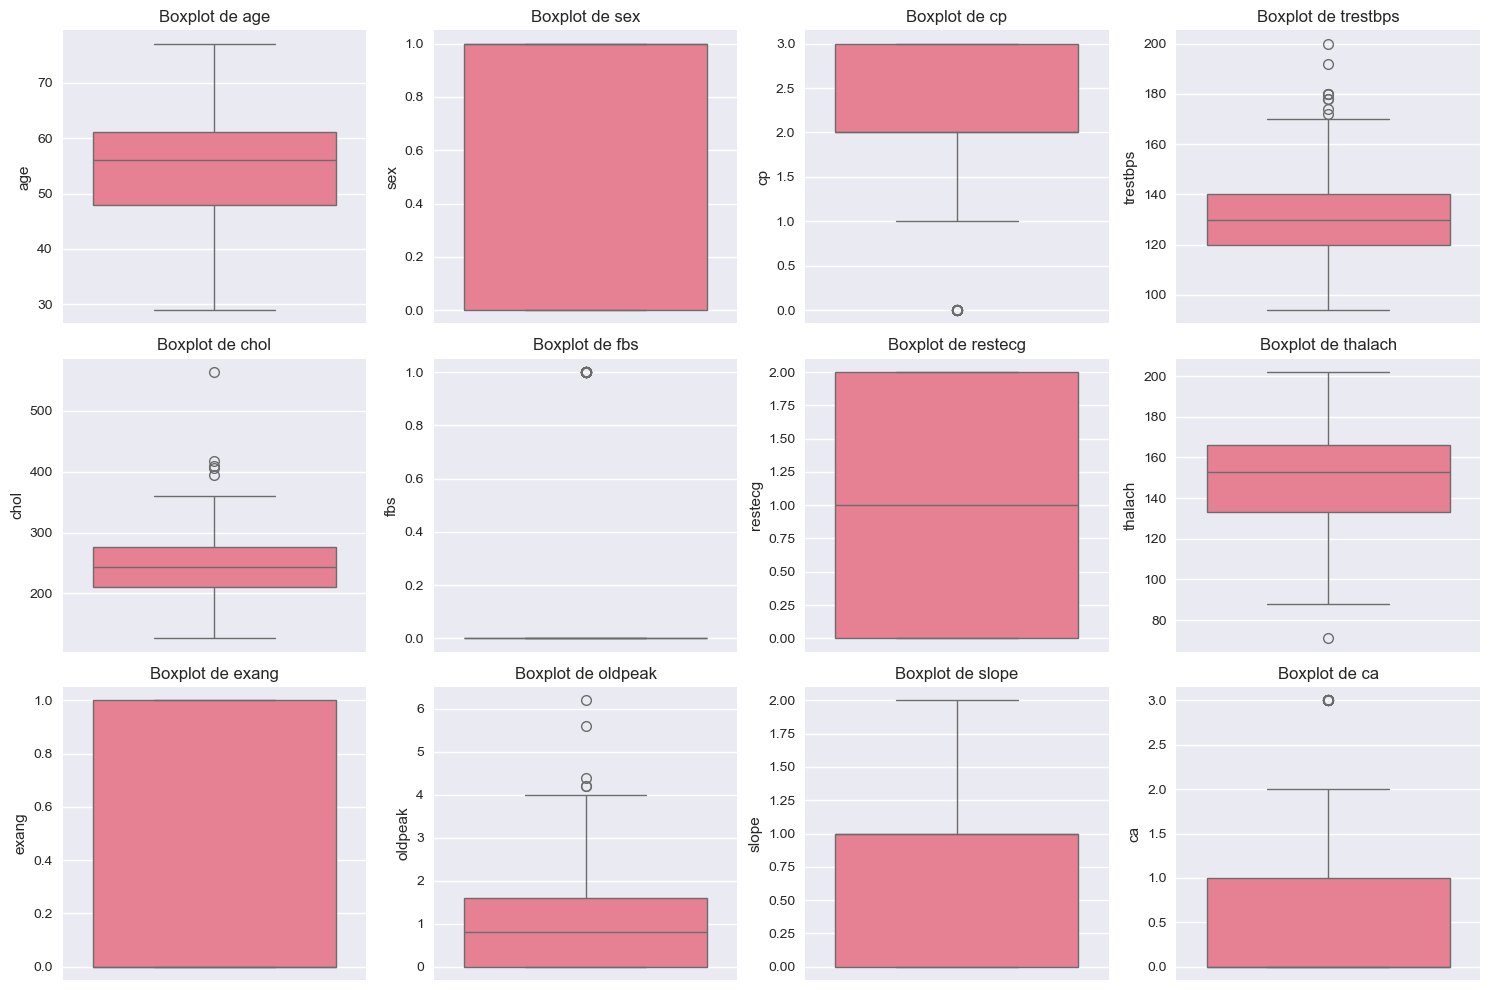


Boxplots: Muestran la mediana, cuartiles y posibles outliers de cada variable numérica.


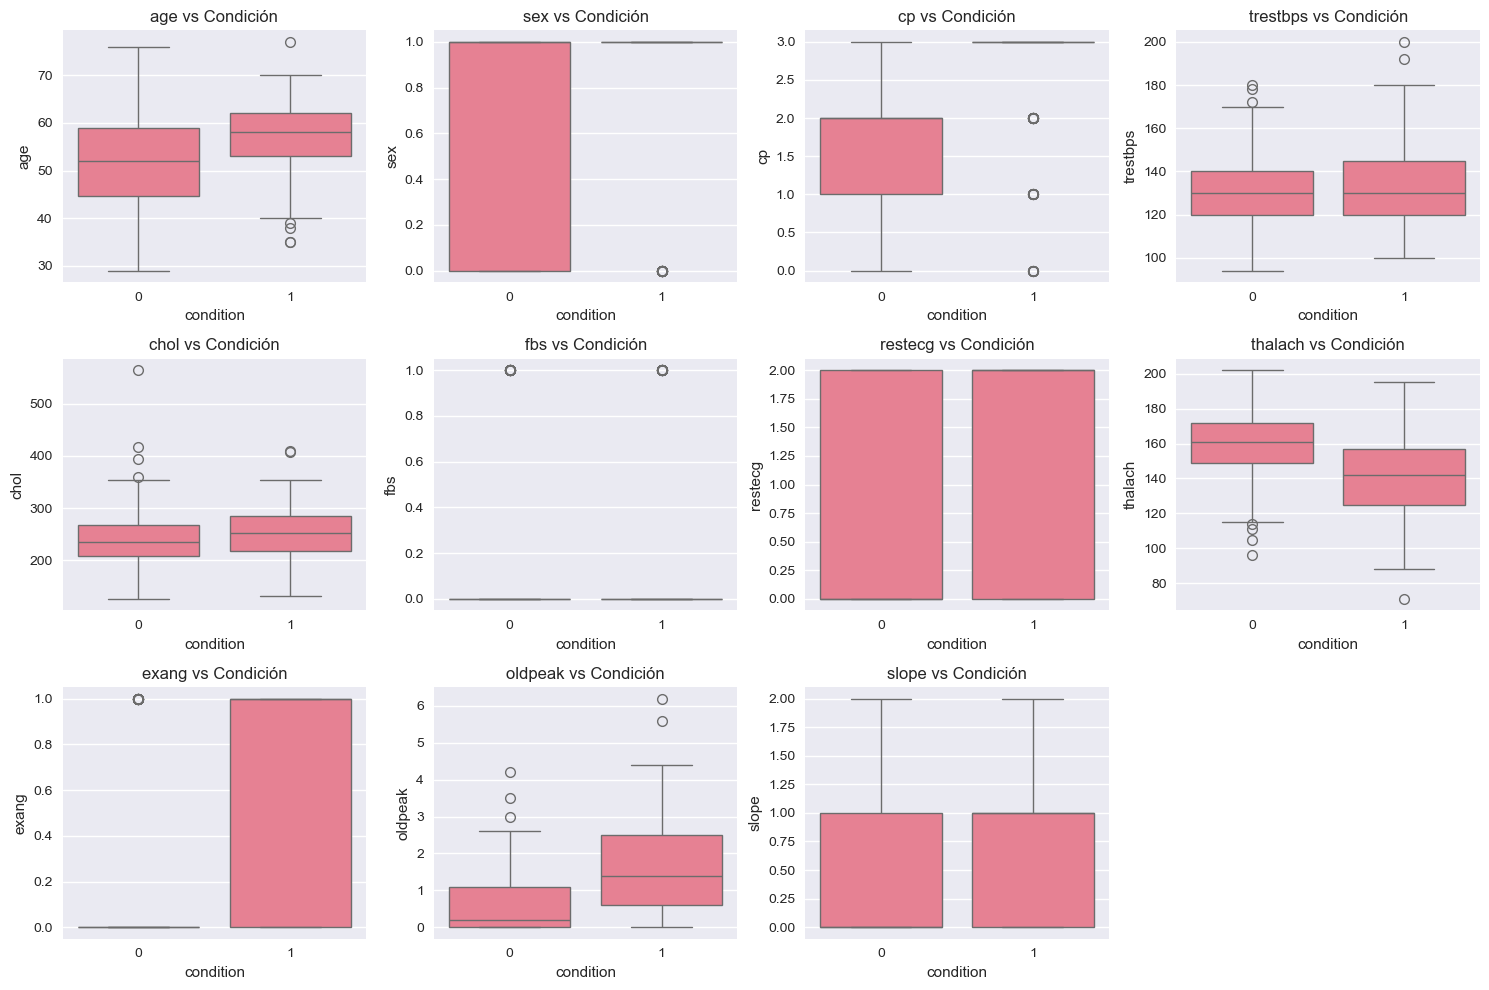


Boxplots de cada variable numérica en relación con la variable objetivo 'condition':
Esto ayuda a visualizar cómo cada variable puede influir en la presencia de enfermedad cardíaca.
Características seleccionadas: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Estas características se han seleccionado basándose en su capacidad para predecir la presencia de enfermedad cardíaca.

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



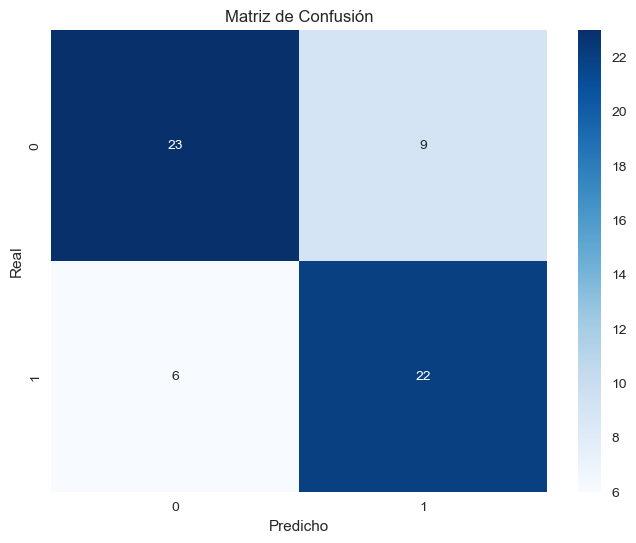


Matriz de Confusión: Muestra el número de predicciones correctas e incorrectas del modelo.
Los verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN) son claves para entender el rendimiento del modelo.


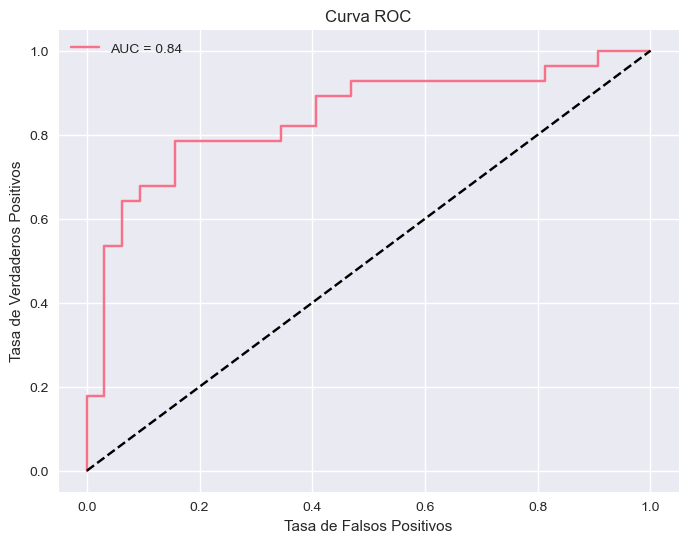


Curva ROC: Representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos.
El área bajo la curva (AUC) indica el rendimiento del modelo; un valor de 1.0 representa un modelo perfecto.


In [48]:
# Configuración de visualización
plt.style.use('seaborn-v0_8')  # Estilo de seaborn
sns.set_palette("husl")  # Paleta de colores

# 1. Carga y exploración inicial de datos
def load_and_explore_data(filepath):
    # Cargar datos
    df = pd.read_csv(filepath)
    
    # Información básica del dataset
    print("Dimensiones del dataset:", df.shape)
    print("\nPrimeras 5 filas del dataset:")
    print(df.head())
    print("\nInformación del dataset:")
    print(df.info())
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    
    # Explicación sobre la variable objetivo
    print("\nLa variable objetivo es 'condition', que indica la presencia de enfermedad cardíaca.")
    print("Se espera que esta variable tenga valores binarios (0 o 1), donde 1 indica presencia de enfermedad.")
    
    return df

# 2. Análisis exploratorio de datos (EDA)
def perform_eda(df):
    # Crear figura para distribución de variables numéricas
    plt.figure(figsize=(15, 10))
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns[:12]  # Limitar a 12 columnas
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(3, 4, i)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribución de {column}')
    plt.tight_layout()
    plt.show()

    print("\nDistribuciones de las variables numéricas: Se visualizan mediante histogramas con KDE (Kernel Density Estimate).")
    
    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()

    print("\nMatriz de correlación: Muestra la relación entre las variables numéricas.")
    print("Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.")
    
    # Boxplots para detectar outliers
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data=df, y=column)
        plt.title(f'Boxplot de {column}')
    plt.tight_layout()
    plt.show()

    print("\nBoxplots: Muestran la mediana, cuartiles y posibles outliers de cada variable numérica.")
    
    # Relación entre variables numéricas y la condición cardíaca
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns[:-1], 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data=df, x='condition', y=column)
        plt.title(f'{column} vs Condición')
    plt.tight_layout()
    plt.show()

    print("\nBoxplots de cada variable numérica en relación con la variable objetivo 'condition':")
    print("Esto ayuda a visualizar cómo cada variable puede influir en la presencia de enfermedad cardíaca.")
    
# 3. Preprocesamiento de datos
def preprocess_data(df):
    # Crear copias para X e y
    X = df.drop('condition', axis=1)
    y = df['condition']
    
    # Escalado de características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Selección de características
    selector = SelectKBest(score_func=f_classif, k=8)
    X_selected = selector.fit_transform(X_scaled, y)
    selected_features = X.columns[selector.get_support()].tolist()
    
    print("Características seleccionadas:", selected_features)
    print("\nEstas características se han seleccionado basándose en su capacidad para predecir la presencia de enfermedad cardíaca.")
    
    return X_selected, y

# 4. Entrenamiento y evaluación del modelo
def train_and_evaluate_model(X, y):
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenamiento del modelo
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Evaluación del modelo
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

    print("\nMatriz de Confusión: Muestra el número de predicciones correctas e incorrectas del modelo.")
    print("Los verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN) son claves para entender el rendimiento del modelo.")
    
    # Curva ROC
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

    print("\nCurva ROC: Representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos.")
    print("El área bajo la curva (AUC) indica el rendimiento del modelo; un valor de 1.0 representa un modelo perfecto.")

    return model

# Ejecución principal
if __name__ == "__main__":
    # 1. Cargar y explorar datos
    df = load_and_explore_data('C:\\Users\\BRAYAN\\heart_cleveland_upload.csv')
    
    # 2. Realizar análisis exploratorio
    perform_eda(df)
    
    # 3. Preprocesar datos
    X_selected, y = preprocess_data(df)
    
    # 4. Entrenar y evaluar modelo
    model = train_and_evaluate_model(X_selected, y)

